In [48]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load the .mat file
data = scipy.io.loadmat(r'C:\Users\alice\OneDrive - Alma Mater Studiorum Università di Bologna\UNI 3\intro to ML\ass 1\COIL20.mat')

In [49]:
# Print the keys in the dictionary to see the variable names
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Y'])


In [50]:
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Mar 17 16:06:33 2015', '__version__': '1.0', '__globals__': [], 'X': array([[0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.01568627],
       [0.01960784, 0.01960784, 0.01960784, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.01568627],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]), 'Y': array([[ 1],
       [ 1],
       [ 1],
       ...,
       [20],
       [20],
       [20]], dtype=uint8)}


In [51]:
# Access and print specific variables
X_data = data['X']
print("X Array Shape:", X_data.shape)
print(X_data)

X Array Shape: (1440, 1024)
[[0.01568627 0.01568627 0.01568627 ... 0.01568627 0.01568627 0.01568627]
 [0.01960784 0.01960784 0.01960784 ... 0.01960784 0.01960784 0.01960784]
 [0.01568627 0.01568627 0.01568627 ... 0.01568627 0.01568627 0.01568627]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [52]:
# Access and print specific variables
Y_data = data['Y']
print("Y Array Shape:", Y_data.shape)
print(Y_data)

Y Array Shape: (1440, 1)
[[ 1]
 [ 1]
 [ 1]
 ...
 [20]
 [20]
 [20]]


Each row is one image <br>X is the main dataset we are exploring <br>Y shows us which photos are the same

In [53]:
# Calculate mean to centralize data
mean = np.mean(X_data, axis=0)

# Centralizing data
centered_X_data = (X_data - mean)

print("Original Data:")
print(X_data)

print("Centered data shape: ", centered_X_data.shape)
print("\nCentered Data:")
print(centered_X_data)


Original Data:
[[0.01568627 0.01568627 0.01568627 ... 0.01568627 0.01568627 0.01568627]
 [0.01960784 0.01960784 0.01960784 ... 0.01960784 0.01960784 0.01960784]
 [0.01568627 0.01568627 0.01568627 ... 0.01568627 0.01568627 0.01568627]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Centered data shape:  (1440, 1024)

Centered Data:
[[ 0.01371647  0.01344839  0.01306849 ...  0.01356107  0.01371392
   0.01371766]
 [ 0.01763804  0.01736996  0.01699006 ...  0.01748264  0.01763548
   0.01763923]
 [ 0.01371647  0.01344839  0.01306849 ...  0.01356107  0.01371392
   0.01371766]
 ...
 [-0.00196981 -0.00223788 -0.00261778 ... -0.0021252  -0.00197236
  -0.00196861]
 [-0.00196981 -0.00223788 -0.00261778 ... -0.0021252  -0.00197236
  -0.00196861]
 [-0.00196981 -0.00223788 -0.00261778 ... -0.0021252  -0.00197236
  -0.00196861]

In [54]:
cov_matrix = np.cov(centered_X_data,rowvar=False)

print(cov_matrix.shape)
print("Covariance Matrix:")
print(cov_matrix)

(1024, 1024)
Covariance Matrix:
[[3.82640294e-05 3.84886680e-05 3.78984931e-05 ... 3.84295286e-05
  3.82467233e-05 3.82479678e-05]
 [3.84886680e-05 8.69694709e-05 1.12161436e-04 ... 5.04798080e-05
  3.79686350e-05 3.77204057e-05]
 [3.78984931e-05 1.12161436e-04 1.76494662e-04 ... 5.56560969e-05
  3.72717041e-05 3.70105376e-05]
 ...
 [3.84295286e-05 5.04798080e-05 5.56560969e-05 ... 4.47758362e-05
  3.83616464e-05 3.81521529e-05]
 [3.82467233e-05 3.79686350e-05 3.72717041e-05 ... 3.83616464e-05
  3.82524130e-05 3.82429382e-05]
 [3.82479678e-05 3.77204057e-05 3.70105376e-05 ... 3.81521529e-05
  3.82429382e-05 3.82574118e-05]]


In [55]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# Print sorted eigenvalues and eigenvectors
print("Eigenvalue shape: ",eigenvalues.shape)
print("Eigenvalues:", eigenvalues)
print()
print("Eigenvector shape: ",eigenvectors.shape)
print("Eigenvectors:\n", eigenvectors)


Eigenvalue shape:  (1024,)
Eigenvalues: [1.78384517e+01 9.19008153e+00 5.23713765e+00 ... 1.72656465e-05
 1.67675583e-05 1.70970472e-05]

Eigenvector shape:  (1024, 1024)
Eigenvectors:
 [[-2.04544574e-04  3.25805682e-04 -9.84930510e-04 ... -6.87536351e-01
  -5.23613391e-01  1.80982604e-01]
 [-2.12144671e-04  3.65364986e-04 -1.01324080e-03 ...  1.45660463e-02
   8.69846465e-03 -2.24958181e-03]
 [-2.17978083e-04  4.55294255e-04 -1.06733397e-03 ... -4.19917705e-03
  -3.89796292e-03  1.70141622e-03]
 ...
 [-2.22693938e-04  3.69248256e-04 -1.03385605e-03 ...  1.88201796e-02
   1.83937527e-02 -7.25865602e-03]
 [-2.05767514e-04  3.27127826e-04 -9.86452976e-04 ...  5.15820011e-01
  -3.01283376e-01  1.78847612e-01]
 [-2.04480050e-04  3.26026516e-04 -9.84809417e-04 ... -1.76282452e-01
   7.65146205e-01  3.74480351e-01]]


In [56]:
# Find d such that we keep 0.9, 0.95 and 0.98 fraction of the total variance

# Calculate the total sum of all components
total_sum = np.sum(eigenvalues)

# Initialize a dictionary to store the results
d_values = {}

for ratio in {0.9,0.95,0.98}:
    # Calculate the cumulative sum of eigenvectors and find d
    cumulative_sum = np.cumsum(eigenvalues) / total_sum
    d = np.argmax(cumulative_sum >= ratio) + 1   # Add 1 because indexing starts from 0
    
    # Store the result
    d_values[f'Ratio {ratio}'] = d

# Print the results
for ratio, d in d_values.items():
    print(f"For {ratio}, d value is: {d}")
    



For Ratio 0.9, d value is: 40
For Ratio 0.95, d value is: 84
For Ratio 0.98, d value is: 175



| Ratio | D value|
|----------|----------|
| 0.9  | 40  | 
| 0.95 | 84 | 
| 0.98 | 175 | 


In [57]:
# Pick the first d principal components
for d in {40,84,175}:
    Ud = eigenvectors[:, :d]
    Zd = np.dot(centered_X_data, Ud) #reduce the dimensionality of the data
    
    print ("d: ",d)
    print("Ud:\n", Ud)
    print("Ud shape: ", Ud.shape)
    print("Eigenvalues:\n", eigenvalues)
    print("Zd (Reduced Data Set):\n", Zd)
    print("Zd shape: ", Zd.shape)
    print()

d:  40
Ud:
 [[-2.04544574e-04  3.25805682e-04 -9.84930510e-04 ... -2.39575625e-05
   1.17934757e-03  1.54726611e-03]
 [-2.12144671e-04  3.65364986e-04 -1.01324080e-03 ...  4.67068199e-04
   3.93052274e-04  1.96844554e-03]
 [-2.17978083e-04  4.55294255e-04 -1.06733397e-03 ...  3.98099635e-04
  -1.14588744e-04  2.28448291e-03]
 ...
 [-2.22693938e-04  3.69248256e-04 -1.03385605e-03 ...  1.42980946e-04
   1.01099513e-03  1.59251985e-03]
 [-2.05767514e-04  3.27127826e-04 -9.86452976e-04 ... -4.04074986e-05
   1.19413986e-03  1.55253170e-03]
 [-2.04480050e-04  3.26026516e-04 -9.84809417e-04 ... -3.78286200e-05
   1.19907664e-03  1.55657215e-03]]
Ud shape:  (1024, 40)
Eigenvalues:
 [1.78384517e+01 9.19008153e+00 5.23713765e+00 ... 1.72656465e-05
 1.67675583e-05 1.70970472e-05]
Zd (Reduced Data Set):
 [[ 0.02743484  3.22270155 -3.74654838 ...  0.29444832  1.14351342
   0.32606838]
 [-0.29117182  3.25268773 -3.93107346 ...  0.23550136  1.23558559
   0.39086549]
 [-0.73744011  3.45465084 -4.0936

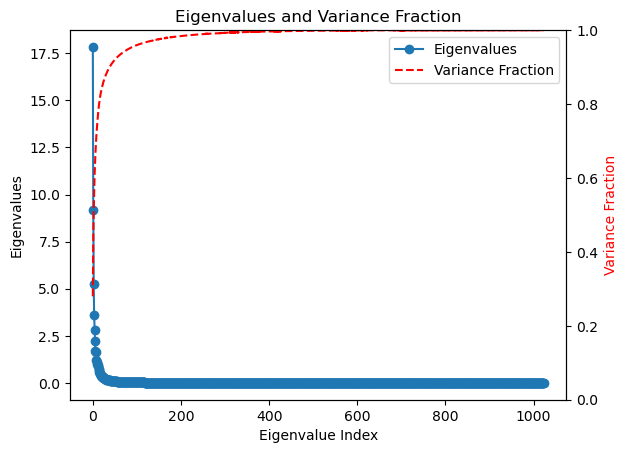

In [85]:
# Calculate the fraction of total variance
total_variance = sum(eigenvalues)
variance_fraction = np.cumsum(eigenvalues) / total_variance

# Plot the eigenvalues
fig, ax1 = plt.subplots()

ax1.plot(idx, eigenvalues, marker='o', label='Eigenvalues')
ax1.set_xlabel('Eigenvalue Index')
ax1.set_ylabel('Eigenvalues')
ax1.tick_params('y')

# Create a secondary y-axis for the variance fraction
ax2 = ax1.twinx()
ax2.plot(idx, variance_fraction, color='red', linestyle='dashed', label='Variance Fraction')
ax2.set_ylabel('Variance Fraction', color='red')
ax2.set_ylim(0, 1)  


# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Eigenvalues and Variance Fraction')
plt.show()


C:\Users\alice\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\alice\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


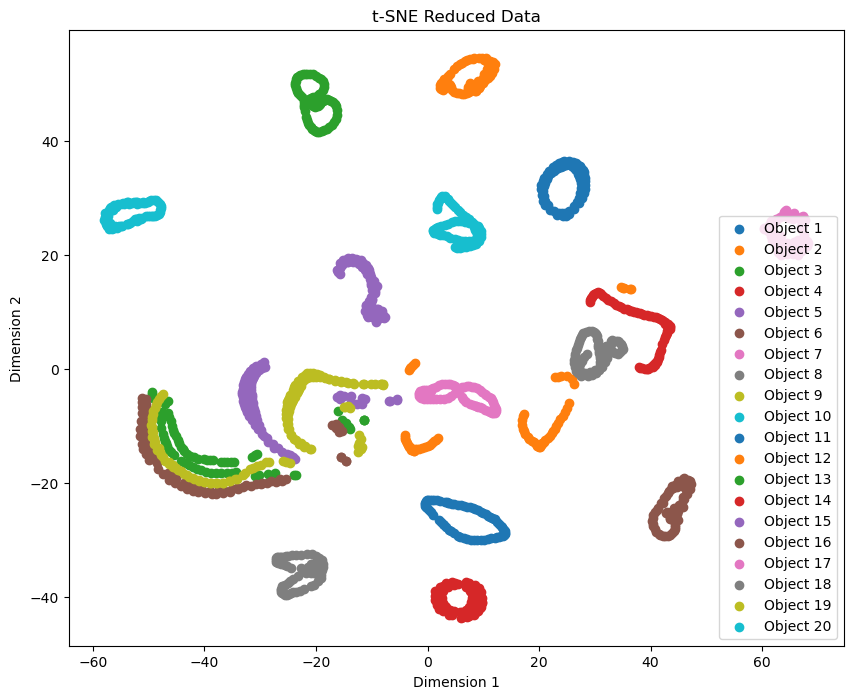

In [94]:
Ud = eigenvectors[:, :40]
Zd = np.dot(centered_X_data,Ud)

# Perform t-SNE on the 40D representation to further reduce to 2D (NO RANDOMNESS)
tsne = TSNE(n_components=2, random_state=0)
Zd_2d = tsne.fit_transform(Zd)  

num_objects = 20  # Number of different objects
num_data_per_object = 72  # Number of data points per object
total_data_points = num_objects * num_data_per_object

# Generate labels based on the object each data point belongs to
labels = np.repeat(np.arange(num_objects), num_data_per_object)

# Plot the t-SNE reduced data with different colors for each object
plt.figure(figsize=(10, 8))
for i in range(num_objects):
    start_idx = i * num_data_per_object
    end_idx = (i + 1) * num_data_per_object
    plt.scatter(
        Zd_2d[start_idx:end_idx, 0],
        Zd_2d[start_idx:end_idx, 1],
        label=f'Object {i+1}'
    )

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Reduced Data')
plt.legend()
plt.show()


C:\Users\alice\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\alice\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


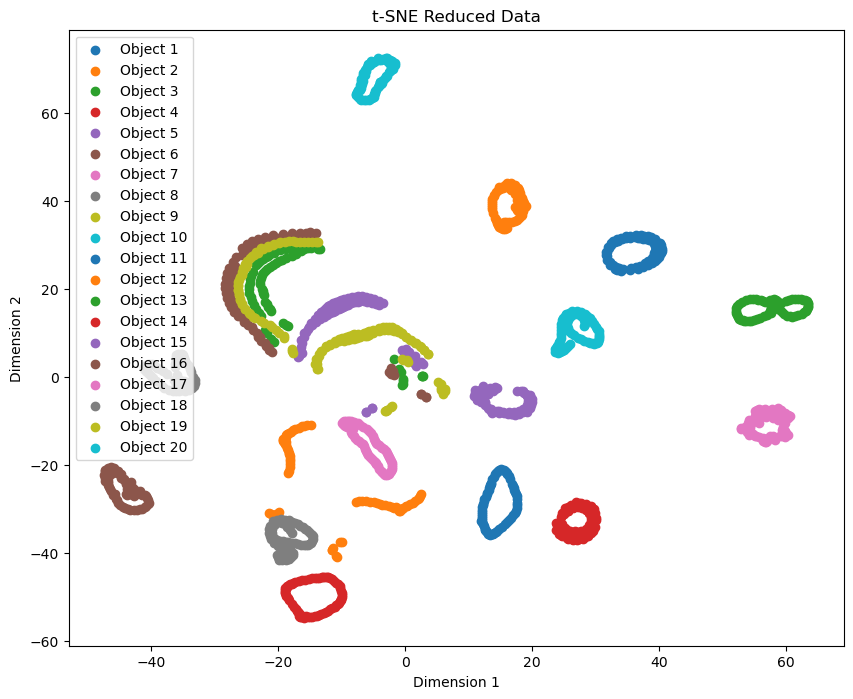

In [97]:
Ud = eigenvectors[:, :40]
Zd = np.dot(centered_X_data,Ud)

# Perform t-SNE on the 40D representation to further reduce to 2D
tsne = TSNE(n_components=2)
Zd_2d = tsne.fit_transform(Zd)  

num_objects = 20  # Number of different objects
num_data_per_object = 72  # Number of data points per object
total_data_points = num_objects * num_data_per_object

# Generate labels based on the object each data point belongs to
labels = np.repeat(np.arange(num_objects), num_data_per_object)

# Plot the t-SNE reduced data with different colors for each object
plt.figure(figsize=(10, 8))
for i in range(num_objects):
    start_idx = i * num_data_per_object
    end_idx = (i + 1) * num_data_per_object
    plt.scatter(
        Zd_2d[start_idx:end_idx, 0],
        Zd_2d[start_idx:end_idx, 1],
        label=f'Object {i+1}'
    )

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Reduced Data')
plt.legend()
plt.show()
